In [1]:
!pip install imblearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

In [2]:
telecom_data=pd.read_csv("telecommunications_churn.csv")

In [3]:
## reading the data set
telecom_data

account_length  voice_mail_plan  voice_mail_messages  day_mins  \
0                128                1                   25     265.1   
1                107                1                   26     161.6   
2                137                0                    0     243.4   
3                 84                0                    0     299.4   
4                 75                0                    0     166.7   
...              ...              ...                  ...       ...   
3328             192                1                   36     156.2   
3329              68                0                    0     231.1   
3330              28                0                    0     180.8   
3331             184                0                    0     213.8   
3332              74                1                   25     234.4   

      evening_mins  night_mins  international_mins  customer_service_calls  \
0            197.4       244.7                10.0                       1   
1            195.5       254.4                13.7                       1   
2            121.2       162.6                12.2                       0   
3             61.9       196.9                 6.6                       2   
4            148.3       186.9                10.1                       3   
...            ...         ...                 ...                     ...   
3328         215.5       279.1                 9.9                       2   
3329         153.4       191.3                 9.6                       3   
3330         288.8       191.9                14.1                       2   
3331         159.6       139.2                 5.0                       2   
3332         265.9       241.4                13.7                       0   

      international_plan  day_calls  day_charge  evening_calls  \
0                      0        110       45.07             99   
1                      0        123       27.47            103   
2                      0        114       41.38            110   
3                      1         71       50.90             88   
4                      1        113       28.34            122   
...                  ...        ...         ...            ...   
3328                   0         77       26.55            126   
3329                   0         57       39.29             55   
3330                   0        109       30.74             58   
3331                   1        105       36.35             84   
3332                   0        113       39.85             82   

      evening_charge  night_calls  night_charge  international_calls  \
0              16.78           91         11.01                    3   
1              16.62          103         11.45                    3   
2              10.30          104          7.32                    5   
3               5.26           89          8.86                    7   
4              12.61          121          8.41                    3   
...              ...          ...           ...                  ...   
3328           18.32           83         12.56                    6   
3329           13.04          123          8.61                    4   
3330           24.55           91          8.64                    6   
3331           13.57          137          6.26                   10   
3332           22.60           77         10.86                    4   

      international_charge  total_charge  churn  
0                     2.70         75.56      0  
1                     3.70         59.24      0  
2                     3.29         62.29      0  
3                     1.78         66.80      0  
4                     2.73         52.09      0  
...                    ...           ...    ...  
3328                  2.67         60.10      0  
3329                  2.59         63.53      0  
3330                  3.81         67.74      0  
3331                  1.35         57.53      

In [4]:
telecom_data.head(10)

account_length  voice_mail_plan  voice_mail_messages  day_mins  \
0             128                1                   25     265.1   
1             107                1                   26     161.6   
2             137                0                    0     243.4   
3              84                0                    0     299.4   
4              75                0                    0     166.7   
5             118                0                    0     223.4   
6             121                1                   24     218.2   
7             147                0                    0     157.0   
8             117                0                    0     184.5   
9             141                1                   37     258.6   

   evening_mins  night_mins  international_mins  customer_service_calls  \
0         197.4       244.7                10.0                       1   
1         195.5       254.4                13.7                       1   
2         121.2       162.6                12.2                       0   
3          61.9       196.9                 6.6                       2   
4         148.3       186.9                10.1                       3   
5         220.6       203.9                 6.3                       0   
6         348.5       212.6                 7.5                       3   
7         103.1       211.8                 7.1                       0   
8         351.6       215.8                 8.7                       1   
9         222.0       326.4                11.2                       0   

   international_plan  day_calls  day_charge  evening_calls  evening_charge  \
0                   0        110       45.07             99           16.78   
1                   0        123       27.47            103           16.62   
2                   0        114       41.38            110           10.30   
3                   1         71       50.90             88            5.26   
4                   1        113       28.34            122           12.61   
5                   1         98       37.98            101           18.75   
6                   0         88       37.09            108           29.62   
7                   1         79       26.69             94            8.76   
8                   0         97       31.37             80           29.89   
9                   1         84       43.96            111           18.87   

   night_calls  night_charge  international_calls  international_charge  \
0           91         11.01                    3                  2.70   
1          103         11.45                    3                  3.70   
2          104          7.32                    5                  3.29   
3           89          8.86                    7                  1.78   
4          121          8.41                    3                  2.73   
5          118          9.18                    6                  1.70   
6          118          9.57                    7                  2.03   
7           96          9.53                    6                  1.92   
8           90          9.71                    4                  2.35   
9           97         14.69                    5                  3.02   

   total_charge  churn  
0         75.56      0  
1         59.24      0  
2         62.29      0  
3         66.80      0  
4         52.09      0  
5         67.61      0  
6         78.31      0  
7         46.90      0  
8         73.32      0  
9         80.54      0

In [5]:
telecom_data.tail(10)

account_length  voice_mail_plan  voice_mail_messages  day_mins  \
3323             117                0                    0     118.4   
3324             159                0                    0     169.8   
3325              78                0                    0     193.4   
3326              96                0                    0     106.6   
3327              79                0                    0     134.7   
3328             192                1                   36     156.2   
3329              68                0                    0     231.1   
3330              28                0                    0     180.8   
3331             184                0                    0     213.8   
3332              74                1                   25     234.4   

      evening_mins  night_mins  international_mins  customer_service_calls  \
3323         249.3       227.0                13.6                       5   
3324         197.7       193.7                11.6                       1   
3325         116.9       243.3                 9.3                       2   
3326         284.8       178.9                14.9                       1   
3327         189.7       221.4                11.8                       2   
3328         215.5       279.1                 9.9                       2   
3329         153.4       191.3                 9.6                       3   
3330         288.8       191.9                14.1                       2   
3331         159.6       139.2                 5.0                       2   
3332         265.9       241.4                13.7                       0   

      international_plan  day_calls  day_charge  evening_calls  \
3323                   0        126       20.13             97   
3324                   0        114       28.87            105   
3325                   0         99       32.88             88   
3326                   0        128       18.12             87   
3327                   0         98       22.90             68   
3328                   0         77       26.55            126   
3329                   0         57       39.29             55   
3330                   0        109       30.74             58   
3331                   1        105       36.35             84   
3332                   0        113       39.85             82   

      evening_charge  night_calls  night_charge  international_calls  \
3323           21.19           56         10.22                    3   
3324           16.80           82          8.72                    4   
3325            9.94          109         10.95                    4   
3326           24.21           92          8.05                    7   
3327           16.12          128          9.96                    5   
3328           18.32           83         12.56                    6   
3329           13.04          123          8.61                    4   
3330           24.55           91          8.64                    6   
3331           13.57          137          6.26                   10   
3332           22.60           77         10.86                    4   

      international_charge  total_charge  churn  
3323                  3.67         55.21      1  
3324                  3.13         57.52      0  
3325                  2.51         56.28      0  
3326                  4.02         54.40      0  
3327                  3.19         52.17      0  
3328                  2.67         60.10      0  
3329                  2.59         63.53      0  
3330                  3.81         67.74      0  
3331                  1.35         57.53      0  
3332                  3.70         77.01      0

In [6]:
telecom_data.shape

(3333, 19)

In [7]:
## all the columns name and unique values contained by each column

for i in telecom_data.columns:
    print(' {} : {}.'.format(i,telecom_data[i].nunique()))

 account_length : 212.
 voice_mail_plan : 2.
 voice_mail_messages : 46.
 day_mins : 1667.
 evening_mins : 1611.
 night_mins : 1591.
 international_mins : 162.
 customer_service_calls : 10.
 international_plan : 2.
 day_calls : 119.
 day_charge : 1667.
 evening_calls : 123.
 evening_charge : 1440.
 night_calls : 120.
 night_charge : 933.
 international_calls : 21.
 international_charge : 162.
 total_charge : 2227.
 churn : 2.


In [8]:
telecom_data.churn.value_counts()

0    2850
1     483
Name: churn, dtype: int64

In [9]:
telecom_data[telecom_data['churn']==1].mean()

account_length            102.664596
voice_mail_plan             0.165631
voice_mail_messages         5.115942
day_mins                  206.914079
evening_mins              212.410145
night_mins                205.231677
international_mins         10.700000
customer_service_calls      2.229814
international_plan          0.283644
day_calls                 101.335404
day_charge                 35.175921
evening_calls             100.561077
evening_charge             18.054969
night_calls               100.399586
night_charge                9.235528
international_calls         4.163561
international_charge        2.889545
total_charge               65.355963
churn                       1.000000
dtype: float64

In [10]:
telecom_data[telecom_data['churn']==0].mean()

account_length            100.793684
voice_mail_plan             0.295439
voice_mail_messages         8.604561
day_mins                  175.175754
evening_mins              199.043298
night_mins                200.133193
international_mins         10.158877
customer_service_calls      1.449825
international_plan          0.065263
day_calls                 100.283158
day_charge                 29.780421
evening_calls             100.038596
evening_charge             16.918909
night_calls               100.058246
night_charge                9.006074
international_calls         4.532982
international_charge        2.743404
total_charge               58.448807
churn                       0.000000
dtype: float64

In [11]:
telecom_data.dtypes

account_length              int64
voice_mail_plan             int64
voice_mail_messages         int64
day_mins                  float64
evening_mins              float64
night_mins                float64
international_mins        float64
customer_service_calls      int64
international_plan          int64
day_calls                   int64
day_charge                float64
evening_calls               int64
evening_charge            float64
night_calls                 int64
night_charge              float64
international_calls         int64
international_charge      float64
total_charge              float64
churn                       int64
dtype: object

In [12]:
telecom_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   account_length          3333 non-null   int64  
 1   voice_mail_plan         3333 non-null   int64  
 2   voice_mail_messages     3333 non-null   int64  
 3   day_mins                3333 non-null   float64
 4   evening_mins            3333 non-null   float64
 5   night_mins              3333 non-null   float64
 6   international_mins      3333 non-null   float64
 7   customer_service_calls  3333 non-null   int64  
 8   international_plan      3333 non-null   int64  
 9   day_calls               3333 non-null   int64  
 10  day_charge              3333 non-null   float64
 11  evening_calls           3333 non-null   int64  
 12  evening_charge          3333 non-null   float64
 13  night_calls             3333 non-null   int64  
 14  night_charge            3333 non-null   

In [13]:
telecom_data.describe()

account_length  voice_mail_plan  voice_mail_messages     day_mins  \
count     3333.000000      3333.000000          3333.000000  3333.000000   
mean       101.064806         0.276628             8.099010   179.775098   
std         39.822106         0.447398            13.688365    54.467389   
min          1.000000         0.000000             0.000000     0.000000   
25%         74.000000         0.000000             0.000000   143.700000   
50%        101.000000         0.000000             0.000000   179.400000   
75%        127.000000         1.000000            20.000000   216.400000   
max        243.000000         1.000000            51.000000   350.800000   

       evening_mins   night_mins  international_mins  customer_service_calls  \
count   3333.000000  3333.000000         3333.000000             3333.000000   
mean     200.980348   200.872037           10.237294                1.562856   
std       50.713844    50.573847            2.791840                1.315491   
min        0.000000    23.200000            0.000000                0.000000   
25%      166.600000   167.000000            8.500000                1.000000   
50%      201.400000   201.200000           10.300000                1.000000   
75%      235.300000   235.300000           12.100000                2.000000   
max      363.700000   395.000000           20.000000                9.000000   

       international_plan    day_calls   day_charge  evening_calls  \
count         3333.000000  3333.000000  3333.000000    3333.000000   
mean             0.096910   100.435644    30.562307     100.114311   
std              0.295879    20.069084     9.259435      19.922625   
min              0.000000     0.000000     0.000000       0.000000   
25%              0.000000    87.000000    24.430000      87.000000   
50%              0.000000   101.000000    30.500000     100.000000   
75%              0.000000   114.000000    36.790000     114.000000   
max              1.000000   165.000000    59.640000     170.000000   

       evening_charge  night_calls  night_charge  international_calls  \
count     3333.000000  3333.000000   3333.000000          3333.000000   
mean        17.083540   100.107711      9.039325             4.479448   
std          4.310668    19.568609      2.275873             2.461214   
min          0.000000    33.000000      1.040000             0.000000   
25%         14.160000    87.000000      7.520000             3.000000   
50%         17.120000   100.000000      9.050000             4.000000   
75%         20.000000   113.000000     10.590000             6.000000   
max         30.910000   175.000000     17.770000            20.000000   

       international_charge  total_charge        churn  
count           3333.000000   3333.000000  3333.000000  
mean               2.764581     59.449754     0.144914  
std                0.753773     10.502261     0.352067  
min                0.000000     22.930000     0.000000  
25%                2.300000     52.380000     0.000000  
50%                2.780000     59.470000     0.000000  
75%                3.270000     66.480000     0.000000  
max                5.400000     96.150000     1.000000

## null values

In [14]:
## there is no null values in the data

telecom_data.isnull().sum()

account_length            0
voice_mail_plan           0
voice_mail_messages       0
day_mins                  0
evening_mins              0
night_mins                0
international_mins        0
customer_service_calls    0
international_plan        0
day_calls                 0
day_charge                0
evening_calls             0
evening_charge            0
night_calls               0
night_charge              0
international_calls       0
international_charge      0
total_charge              0
churn                     0
dtype: int64

## Duplicates

In [15]:
#Count of duplicated rows
telecom_data[telecom_data.duplicated()].shape

(0, 19)

## correlation Analysis

In [16]:
## relation between features and their relation with target variable . 

corr= telecom_data.corr()
corr

account_length  voice_mail_plan  voice_mail_messages  \
account_length                1.000000         0.002918            -0.004628   
voice_mail_plan               0.002918         1.000000             0.956927   
voice_mail_messages          -0.004628         0.956927             1.000000   
day_mins                      0.006216        -0.001684             0.000778   
evening_mins                 -0.006757         0.021545             0.017562   
night_mins                   -0.008955         0.006079             0.007681   
international_mins            0.009514        -0.001318             0.002856   
customer_service_calls       -0.003796        -0.017824            -0.013263   
international_plan            0.024735         0.006006             0.008745   
day_calls                     0.038470        -0.011086            -0.009548   
day_charge                    0.006214        -0.001686             0.000776   
evening_calls                 0.019260        -0.006444            -0.005864   
evening_charge               -0.006745         0.021559             0.017578   
night_calls                  -0.013176         0.015553             0.007123   
night_charge                 -0.008960         0.006064             0.007663   
international_calls           0.020661         0.007618             0.013957   
international_charge          0.009546        -0.001276             0.002884   
total_charge                  0.001454         0.008585             0.009766   
churn                         0.016541        -0.102148            -0.089728   

                        day_mins  evening_mins  night_mins  \
account_length          0.006216     -0.006757   -0.008955   
voice_mail_plan        -0.001684      0.021545    0.006079   
voice_mail_messages     0.000778      0.017562    0.007681   
day_mins                1.000000      0.007043    0.004323   
evening_mins            0.007043      1.000000   -0.012584   
night_mins              0.004323     -0.012584    1.000000   
international_mins     -0.010155     -0.011035   -0.015207   
customer_service_calls -0.013423     -0.012985   -0.009288   
international_plan      0.049396      0.019100   -0.028905   
day_calls               0.006750     -0.021451    0.022938   
day_charge              1.000000      0.007050    0.004324   
evening_calls           0.015769     -0.011430   -0.002093   
evening_charge          0.007029      1.000000   -0.012592   
night_calls             0.022972      0.007586    0.011204   
night_charge            0.004300     -0.012593    0.999999   
international_calls     0.008033      0.002541   -0.012353   
international_charge   -0.010092     -0.011067   -0.015180   
total_charge            0.884754      0.413143    0.214257   
churn                   0.205151      0.092796    0.035493   

                        international_mins  customer_service_calls  \
account_length                    0.009514               -0.003796   
voice_mail_plan                  -0.001318               -0.017824   
voice_mail_messages               0.002856               -0.013263   
day_mins                         -0.010155               -0.013423   
evening_mins                     -0.011035               -0.012985   
night_mins                       -0.015207               -0.009288   
international_mins                1.000000               -0.009640   
customer_service_calls           -0.009640                1.000000   
international_plan                0.045871               -0.024522   
day_calls                         0.021565               -0.018942   
day_charge                       -0.010157               -0.013427   
evening_calls                     0.008703                0.002423   
evening_charge                   -0.011043               -0.012987   
night_calls                      -0.013605               -0.012802   
night_charge                     -0.015214               -0.009277   
international_calls               0.032304               -0.01

C:\Users\Sahadev\anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


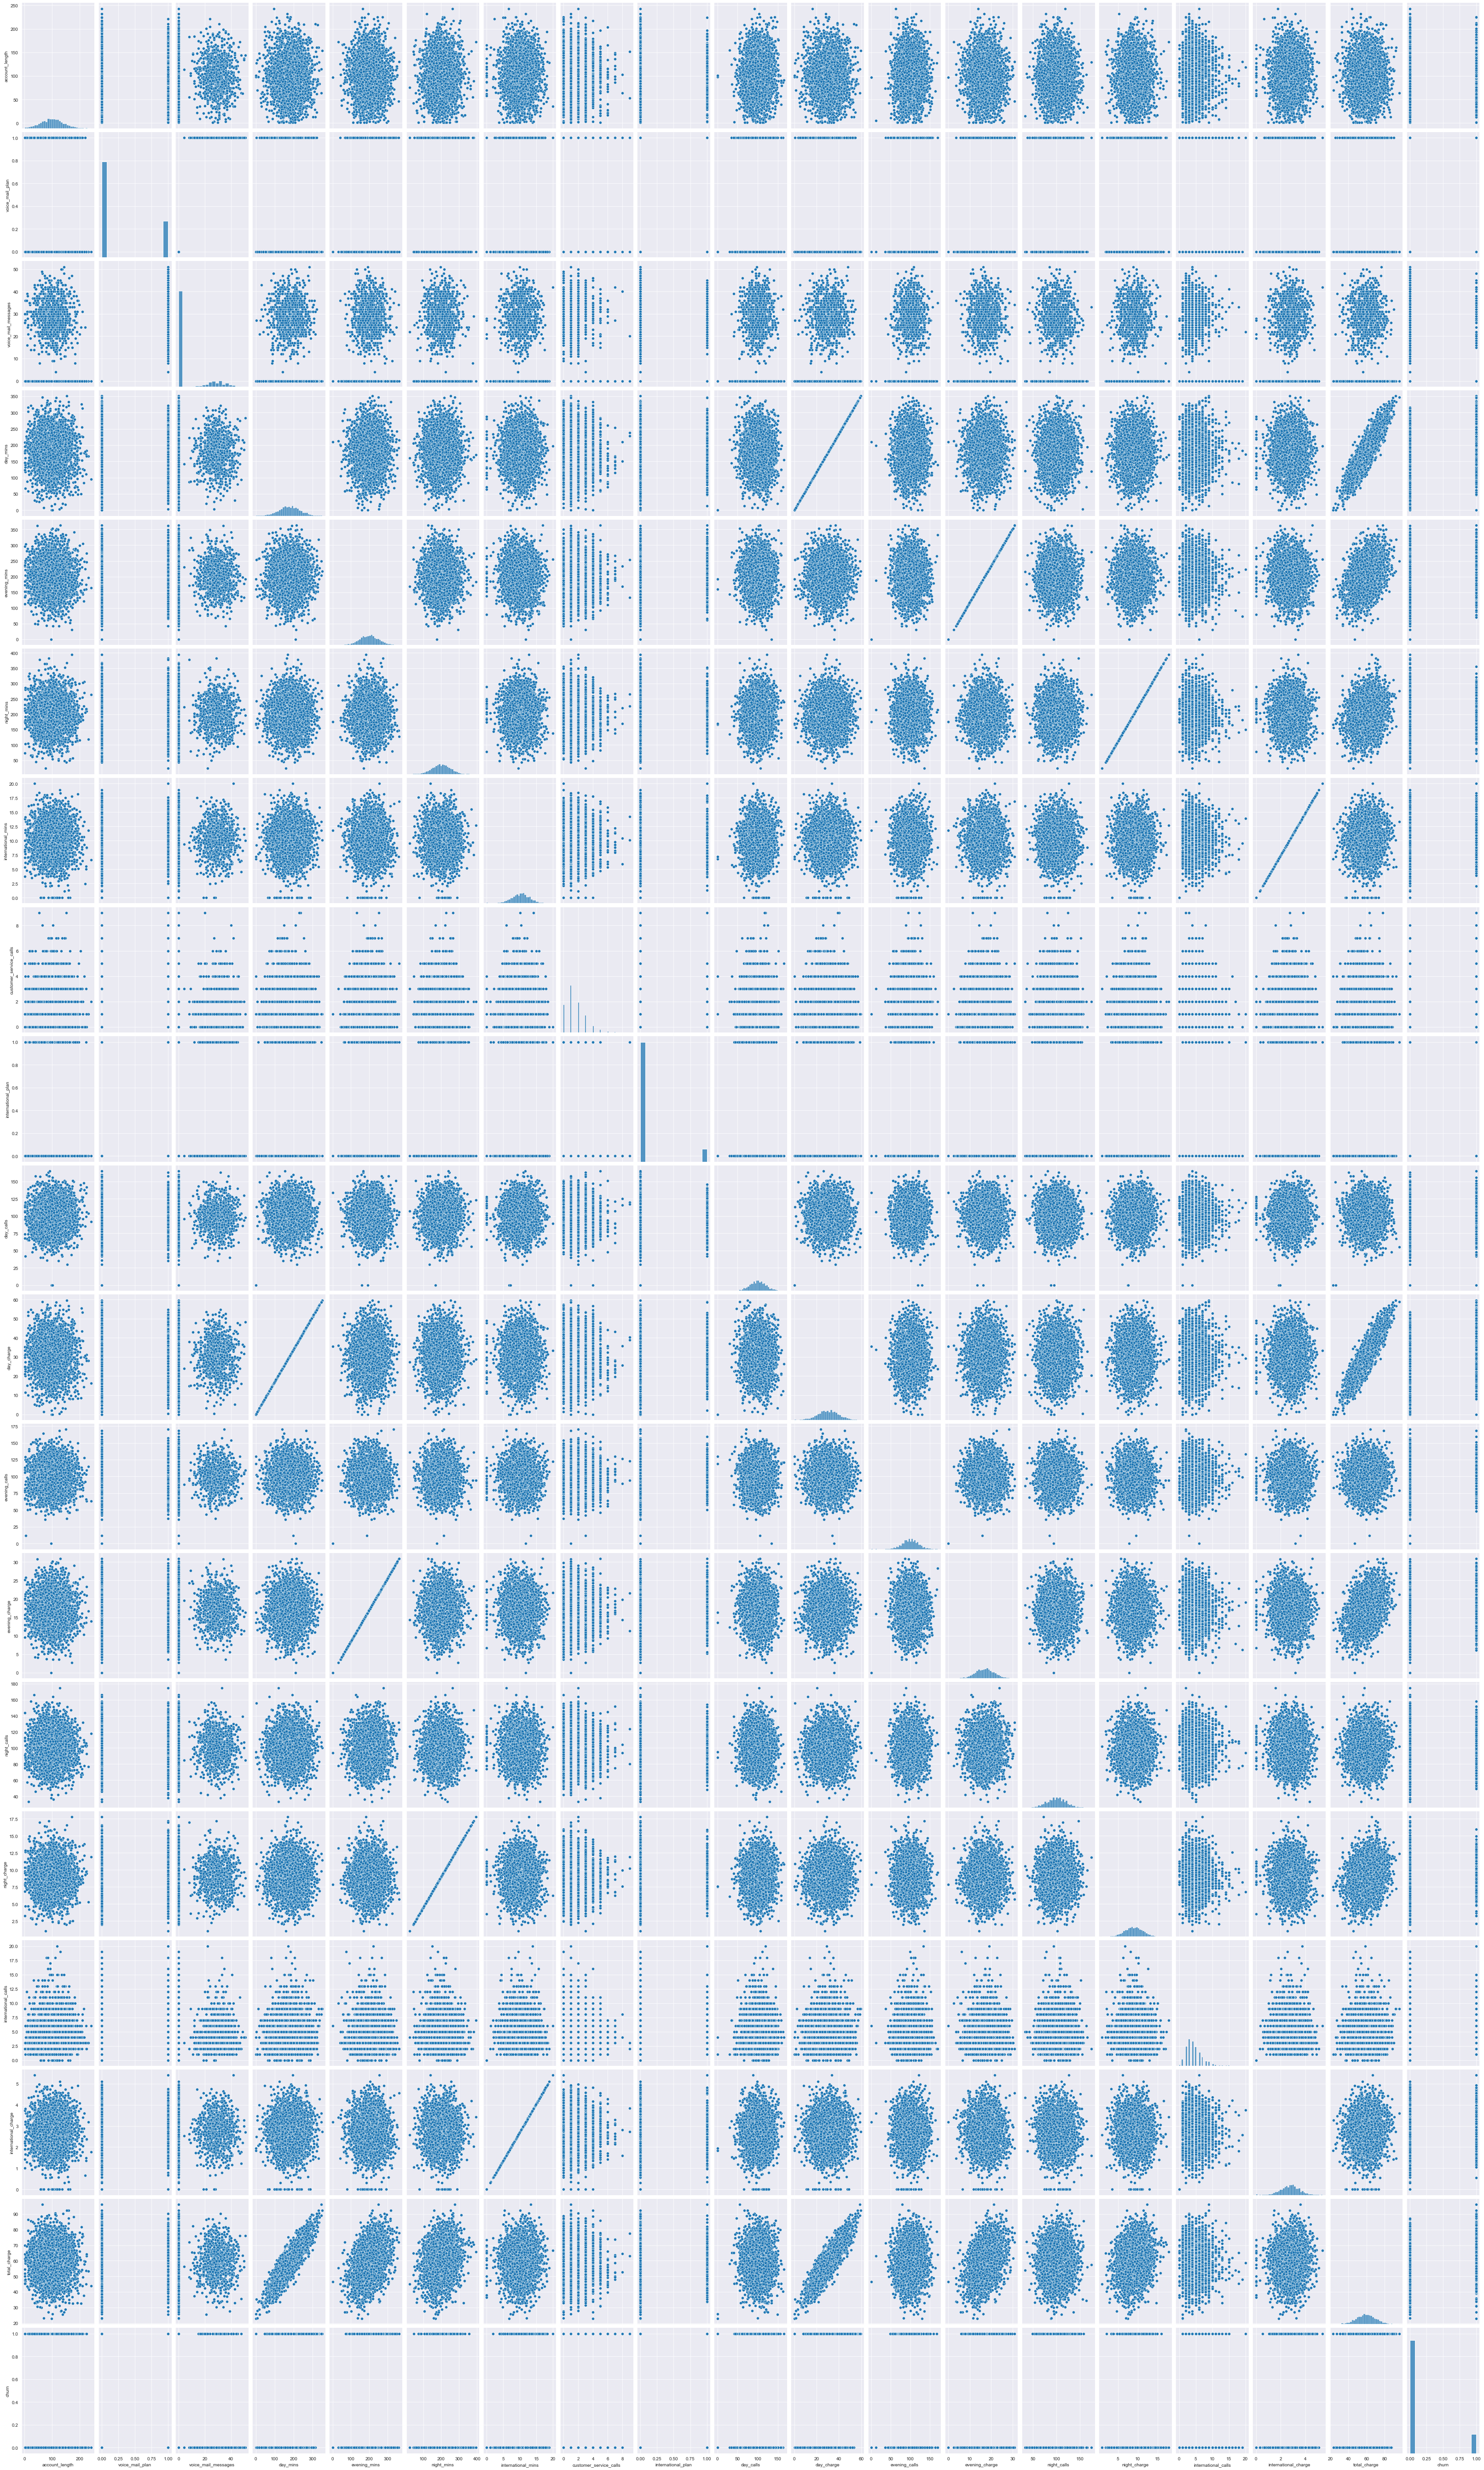

In [17]:
sns.set_style(style='darkgrid',)
sns.pairplot(telecom_data,size=4,aspect=0.6)

<AxesSubplot:>

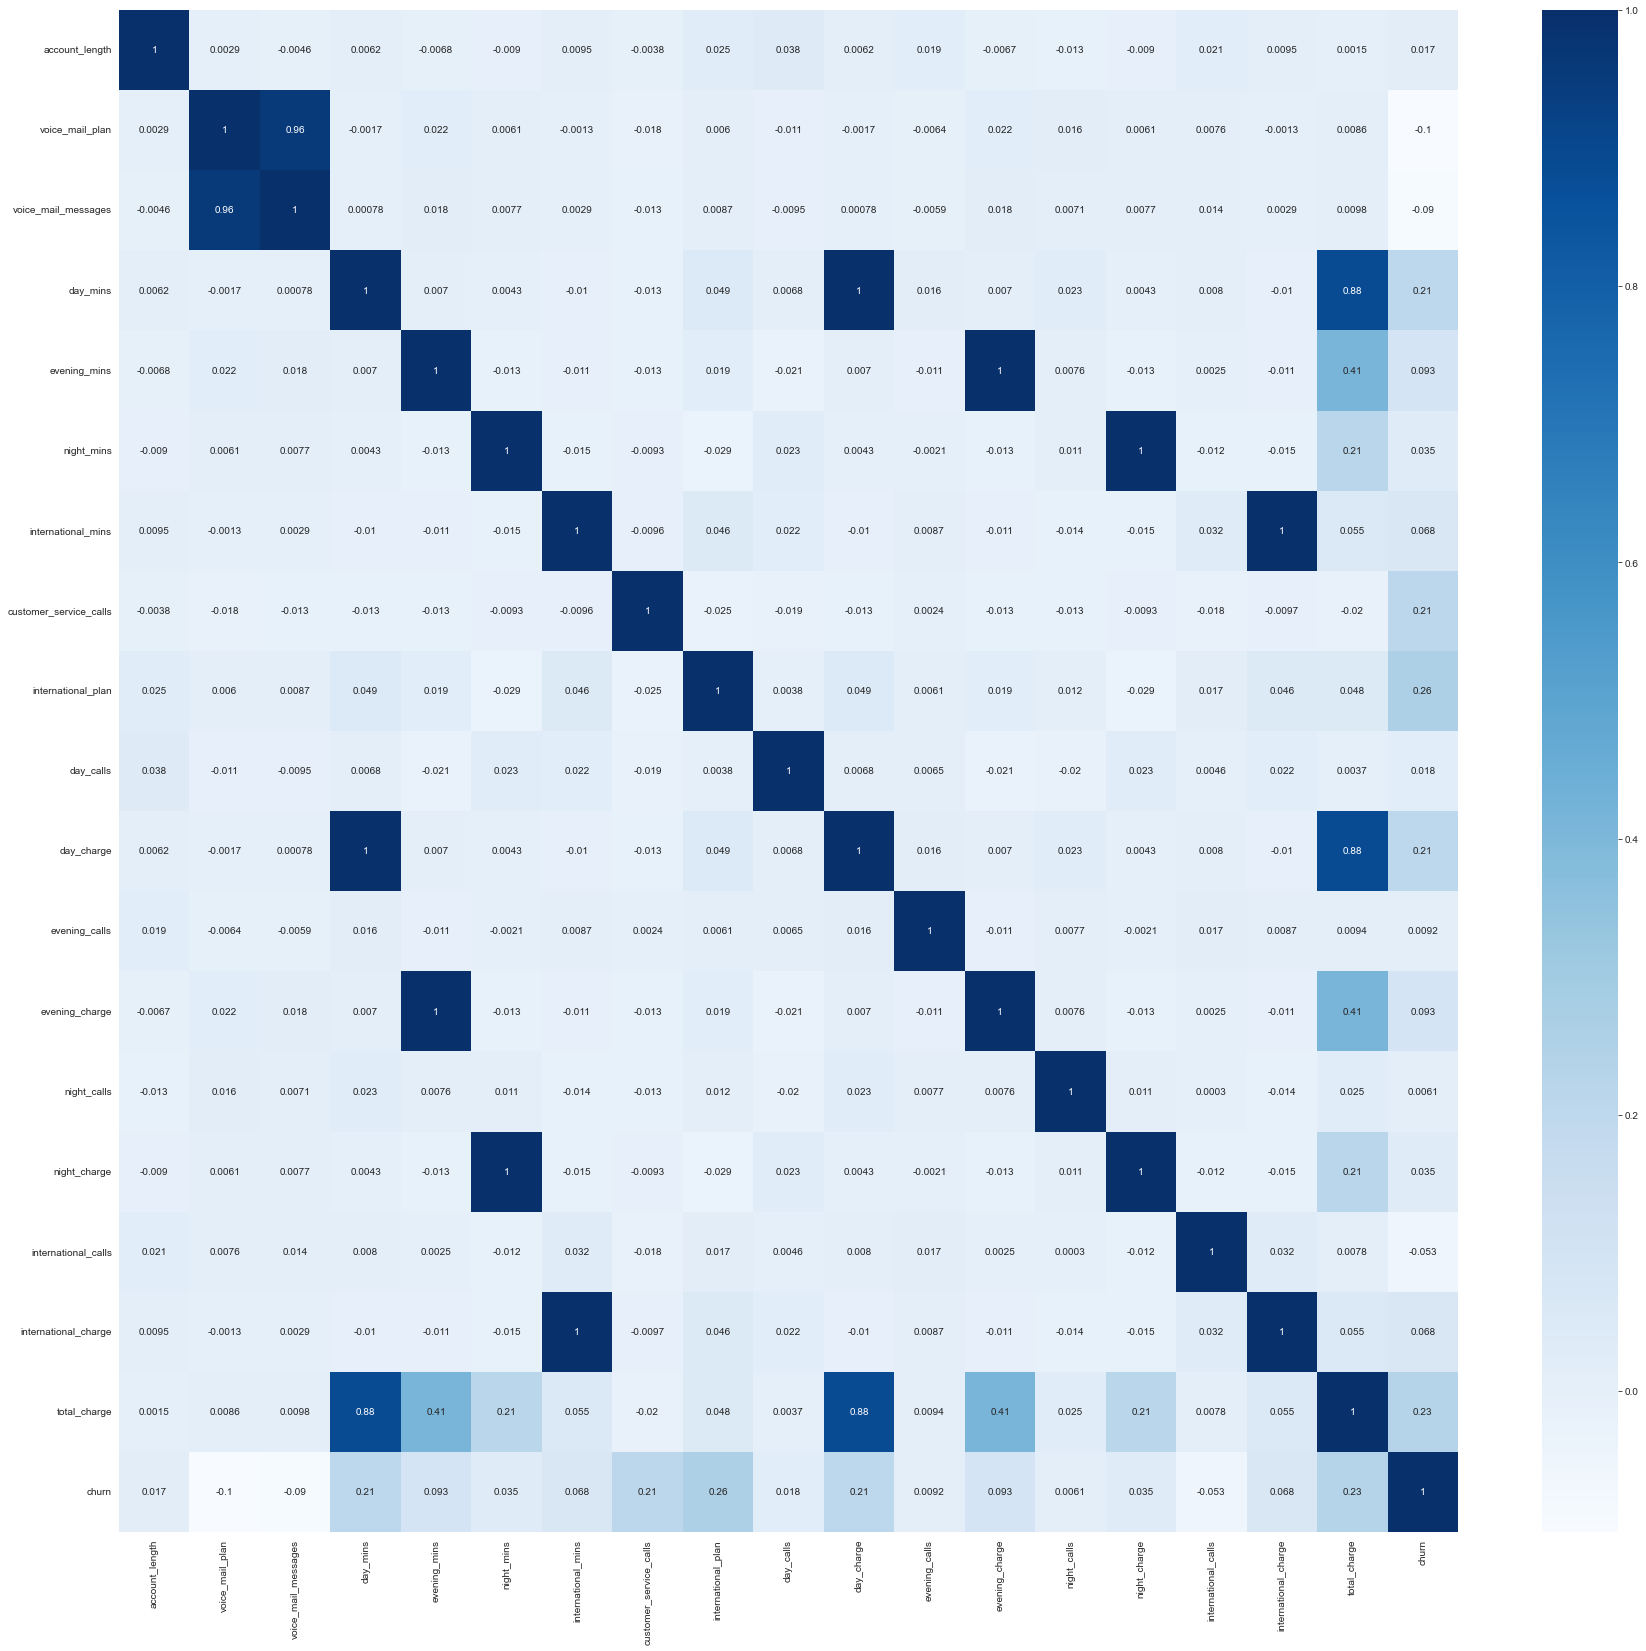

In [20]:
## visualisation of correlation through heat map

plt.figure(figsize=(30,28))
sns.heatmap(corr,
            annot=True, 
            cmap='Blues')
           

C:\Users\Sahadev\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='day_charge', ylabel='total_charge'>

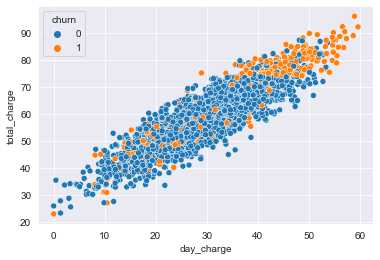

In [21]:
sns.scatterplot(telecom_data.day_charge,telecom_data.total_charge, hue=telecom_data.churn)

day_chage is highly positively corelated to total charge and at high charges no of churn customers are increases .

C:\Users\Sahadev\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='night_charge', ylabel='total_charge'>

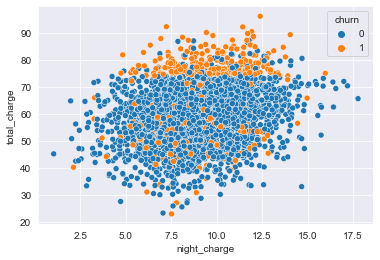

In [22]:
sns.scatterplot(telecom_data.night_charge, telecom_data.total_charge, hue=telecom_data.churn)

night_charge is least related to total_charge.

C:\Users\Sahadev\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='evening_charge', ylabel='total_charge'>

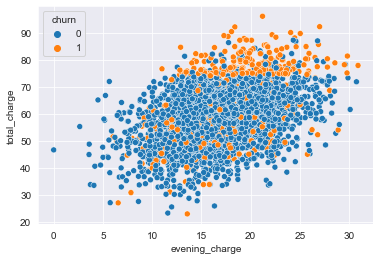

In [23]:
sns.scatterplot(telecom_data.evening_charge,telecom_data.total_charge, hue=telecom_data.churn)

as compared to day charge evening charge is less related to total charge.

C:\Users\Sahadev\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='churn', ylabel='count'>

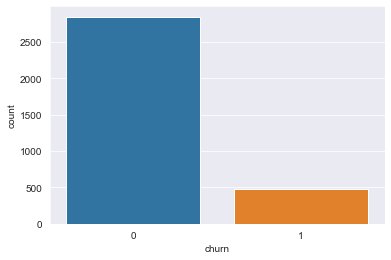

In [24]:
sns.countplot(telecom_data.churn, data=telecom_data)

our dataset is highly imbalanced as the number of churners are very less as compare number of to non-churners

C:\Users\Sahadev\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='churn', ylabel='voice_mail_messages'>

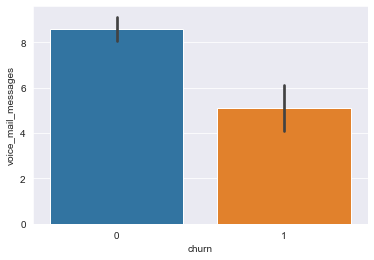

In [25]:
sns.barplot(telecom_data.churn, telecom_data.voice_mail_messages)

churner customers have less no of voice mail messages.

C:\Users\Sahadev\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='churn', ylabel='customer_service_calls'>

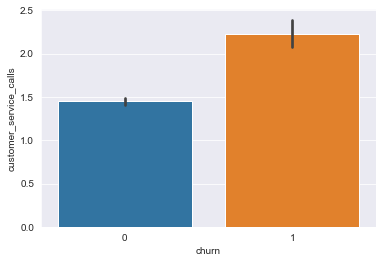

In [26]:
sns.barplot(telecom_data.churn, telecom_data.customer_service_calls)

churner costumers have high no of customers service calls.

C:\Users\Sahadev\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='international_plan', ylabel='count'>

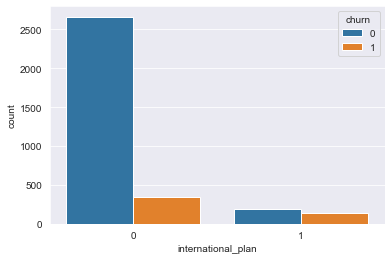

In [27]:
sns.countplot(telecom_data.international_plan, hue='churn', data=telecom_data)

customers who do not have international plans are high churners

### train_test split

In [18]:
## splitting data into x and y
x=telecom_data.iloc[:,0:18]
y=telecom_data.iloc[:,18]

In [19]:
x.columns

Index(['account_length', 'voice_mail_plan', 'voice_mail_messages', 'day_mins',
       'evening_mins', 'night_mins', 'international_mins',
       'customer_service_calls', 'international_plan', 'day_calls',
       'day_charge', 'evening_calls', 'evening_charge', 'night_calls',
       'night_charge', 'international_calls', 'international_charge',
       'total_charge'],
      dtype='object')

### Feature Selection Method 1: Chi2 Score¶

In [20]:
#using SelectKBest class to extract top 10 best features
best_features = SelectKBest(score_func=chi2, k=10)
chi2_fit = best_features.fit(x,y)

In [21]:
scores = pd.DataFrame(chi2_fit.scores_)
columns = pd.DataFrame(x.columns)

In [22]:
featureScores = pd.concat([columns, scores], axis=1)
featureScores.columns = ['Feature','Score'] 

In [23]:
#from this list top n features can be selected for model
featureScores.sort_values(by='Score', ascending=False)

Feature        Score
3                 day_mins  2314.169315
2      voice_mail_messages   620.628799
10              day_charge   393.399658
4             evening_mins   367.164781
17            total_charge   331.440144
8       international_plan   203.244178
7   customer_service_calls   160.773588
5               night_mins    53.446506
12          evening_charge    31.201931
1          voice_mail_plan    25.156959
0           account_length    14.304197
15     international_calls    12.582769
6       international_mins    11.813081
9                day_calls     4.553059
16    international_charge     3.190593
14            night_charge     2.405542
11           evening_calls     1.126160
13             night_calls     0.480689

In [24]:
telecom_data2=telecom_data.copy()

In [25]:
# libraries for Normalization of the data 

from numpy import set_printoptions
from sklearn.preprocessing import MinMaxScaler

In [26]:
telecom_data2

account_length  voice_mail_plan  voice_mail_messages  day_mins  \
0                128                1                   25     265.1   
1                107                1                   26     161.6   
2                137                0                    0     243.4   
3                 84                0                    0     299.4   
4                 75                0                    0     166.7   
...              ...              ...                  ...       ...   
3328             192                1                   36     156.2   
3329              68                0                    0     231.1   
3330              28                0                    0     180.8   
3331             184                0                    0     213.8   
3332              74                1                   25     234.4   

      evening_mins  night_mins  international_mins  customer_service_calls  \
0            197.4       244.7                10.0                       1   
1            195.5       254.4                13.7                       1   
2            121.2       162.6                12.2                       0   
3             61.9       196.9                 6.6                       2   
4            148.3       186.9                10.1                       3   
...            ...         ...                 ...                     ...   
3328         215.5       279.1                 9.9                       2   
3329         153.4       191.3                 9.6                       3   
3330         288.8       191.9                14.1                       2   
3331         159.6       139.2                 5.0                       2   
3332         265.9       241.4                13.7                       0   

      international_plan  day_calls  day_charge  evening_calls  \
0                      0        110       45.07             99   
1                      0        123       27.47            103   
2                      0        114       41.38            110   
3                      1         71       50.90             88   
4                      1        113       28.34            122   
...                  ...        ...         ...            ...   
3328                   0         77       26.55            126   
3329                   0         57       39.29             55   
3330                   0        109       30.74             58   
3331                   1        105       36.35             84   
3332                   0        113       39.85             82   

      evening_charge  night_calls  night_charge  international_calls  \
0              16.78           91         11.01                    3   
1              16.62          103         11.45                    3   
2              10.30          104          7.32                    5   
3               5.26           89          8.86                    7   
4              12.61          121          8.41                    3   
...              ...          ...           ...                  ...   
3328           18.32           83         12.56                    6   
3329           13.04          123          8.61                    4   
3330           24.55           91          8.64                    6   
3331           13.57          137          6.26                   10   
3332           22.60           77         10.86                    4   

      international_charge  total_charge  churn  
0                     2.70         75.56      0  
1                     3.70         59.24      0  
2                     3.29         62.29      0  
3                     1.78         66.80      0  
4                     2.73         52.09      0  
...                    ...           ...    ...  
3328                  2.67         60.10      0  
3329                  2.59         63.53      0  
3330                  3.81         67.74      0  
3331                  1.35         57.53      

In [27]:
## normalizing the data

scaler = MinMaxScaler(feature_range=(0,1))
telecom_data2.iloc[:,2:8]=scaler.fit_transform(telecom_data2.iloc[:,2:8])

In [28]:
scaler = MinMaxScaler(feature_range=(0,1))
telecom_data2.iloc[:,9:18]=scaler.fit_transform(telecom_data2.iloc[:,9:18])

In [29]:
telecom_data2

account_length  voice_mail_plan  voice_mail_messages  day_mins  \
0                128                1             0.490196  0.755701   
1                107                1             0.509804  0.460661   
2                137                0             0.000000  0.693843   
3                 84                0             0.000000  0.853478   
4                 75                0             0.000000  0.475200   
...              ...              ...                  ...       ...   
3328             192                1             0.705882  0.445268   
3329              68                0             0.000000  0.658780   
3330              28                0             0.000000  0.515393   
3331             184                0             0.000000  0.609464   
3332              74                1             0.490196  0.668187   

      evening_mins  night_mins  international_mins  customer_service_calls  \
0         0.542755    0.595750               0.500                0.111111   
1         0.537531    0.621840               0.685                0.111111   
2         0.333242    0.374933               0.610                0.000000   
3         0.170195    0.467187               0.330                0.222222   
4         0.407754    0.440290               0.505                0.333333   
...            ...         ...                 ...                     ...   
3328      0.592521    0.688273               0.495                0.222222   
3329      0.421776    0.452125               0.480                0.333333   
3330      0.794061    0.453739               0.705                0.222222   
3331      0.438823    0.311996               0.250                0.222222   
3332      0.731097    0.586875               0.685                0.000000   

      international_plan  day_calls  day_charge  evening_calls  \
0                      0   0.666667    0.755701       0.582353   
1                      0   0.745455    0.460597       0.605882   
2                      0   0.690909    0.693830       0.647059   
3                      1   0.430303    0.853454       0.517647   
4                      1   0.684848    0.475184       0.717647   
...                  ...        ...         ...            ...   
3328                   0   0.466667    0.445171       0.741176   
3329                   0   0.345455    0.658786       0.323529   
3330                   0   0.660606    0.515426       0.341176   
3331                   1   0.636364    0.609490       0.494118   
3332                   0   0.684848    0.668176       0.482353   

      evening_charge  night_calls  night_charge  international_calls  \
0           0.542866     0.408451      0.595935                 0.15   
1           0.537690     0.492958      0.622236                 0.15   
2           0.333225     0.500000      0.375374                 0.25   
3           0.170171     0.394366      0.467424                 0.35   
4           0.407959     0.619718      0.440526                 0.15   
...              ...          ...           ...                  ...   
3328        0.592688     0.352113      0.688583                 0.30   
3329        0.421870     0.633803      0.452481                 0.20   
3330        0.794241     0.408451      0.454274                 0.30   
3331        0.439016     0.732394      0.312014                 0.50   
3332        0.731155     0.309859      0.586970                 0.20   

      international_charge  total_charge  churn  
0                 0.500000      0.718793      0  
1                 0.685185      0.495903      0  
2                 0.609259      0.537558      0  
3                 0.329630      0.599153      0  
4                 0.505556      0.398252      0  
...                    ...           ...    ...  
3328              0.494444      0.507648      0  
3329              0.479630      0.554493      0  
3330              0.705556      0.611991      0  
3331              0.250000      0.472548      

In [30]:
## dropping all the columns except top 7 column having high chi2 score.(selecting top 7 features from chi2 score)

telecom_cleaned=telecom_data2.drop(['night_mins','evening_charge','voice_mail_plan','account_length','international_calls','international_mins','day_calls', 'international_charge', 'night_charge', 'evening_calls', 'night_calls'], axis=1, inplace=False)

In [31]:
telecom_cleaned

voice_mail_messages  day_mins  evening_mins  customer_service_calls  \
0                0.490196  0.755701      0.542755                0.111111   
1                0.509804  0.460661      0.537531                0.111111   
2                0.000000  0.693843      0.333242                0.000000   
3                0.000000  0.853478      0.170195                0.222222   
4                0.000000  0.475200      0.407754                0.333333   
...                   ...       ...           ...                     ...   
3328             0.705882  0.445268      0.592521                0.222222   
3329             0.000000  0.658780      0.421776                0.333333   
3330             0.000000  0.515393      0.794061                0.222222   
3331             0.000000  0.609464      0.438823                0.222222   
3332             0.490196  0.668187      0.731097                0.000000   

      international_plan  day_charge  total_charge  churn  
0                      0    0.755701      0.718793      0  
1                      0    0.460597      0.495903      0  
2                      0    0.693830      0.537558      0  
3                      1    0.853454      0.599153      0  
4                      1    0.475184      0.398252      0  
...                  ...         ...           ...    ...  
3328                   0    0.445171      0.507648      0  
3329                   0    0.658786      0.554493      0  
3330                   0    0.515426      0.611991      0  
3331                   1    0.609490      0.472548      0  
3332                   0    0.668176      0.738596      0  

[3333 rows x 8 columns]

## model building using logestic regression

In [32]:
## importing importent libraries for model building 


from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [33]:
## X represent all the the features and Y represent the target variable.

X=telecom_cleaned.iloc[:,0:7]
Y=telecom_cleaned.iloc[:,7]

In [44]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.13, random_state = 0)

In [45]:
## building the logestic regression model

model=LogisticRegression()
model.fit(x_train, y_train )

LogisticRegression()

In [46]:
## predicting training data set

y_pred_train = model.predict(x_train)

In [47]:
y_pred_train_df = pd.DataFrame({'actual': y_train,
                         'predicted_prob': y_pred_train})

In [48]:
y_pred_train_df

actual  predicted_prob
984        0               0
3317       0               0
3109       0               0
927        0               0
2774       1               0
...      ...             ...
835        0               0
3264       0               0
1653       1               0
2607       0               0
2732       1               1

[2899 rows x 2 columns]

In [49]:
## training accuracy 

from sklearn.metrics import accuracy_score

print(f'Training-set accuracy score: {round(accuracy_score(y_train, y_pred_train),3)}')

Training-set accuracy score: 0.86


In [50]:
##predicting y_test values for x_test data

y_pred_test = model.predict(x_test)

In [51]:
y_pred_test_df= pd.DataFrame({'actual': y_test,
                         'predicted_prob': y_pred_test})

In [52]:
##dataframe for predicted values and actual value
y_pred_test_df

actual  predicted_prob
405        0               0
118        0               0
710        0               0
499        0               0
2594       1               1
...      ...             ...
3061       0               0
2235       0               0
2669       0               0
49         0               0
936        0               0

[434 rows x 2 columns]

In [53]:
acc_val = accuracy_score(y_test, y_pred_test)
acc_val_rounded = round(acc_val,4)

In [54]:
## testing accuracy

print(f'Testing-set accuracy score: {acc_val_rounded}')

Testing-set accuracy score: 0.8594


In [55]:
## Confusion Matrix

cm= confusion_matrix(y_test,y_pred_test)
print('Confusion matrix\n\n', cm)

Confusion matrix

 [[364  10]
 [ 51   9]]


In [56]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

print('\ntrue positive(TP)=',TP)

print('\ntrue negative(TN)=',TN)

print('\nfalse positive(FP)=',FP)

print('\nfalse negative(FN)=',FN)



true positive(TP)= 364

true negative(TN)= 9

false positive(FP)= 10

false negative(FN)= 51


<AxesSubplot:>

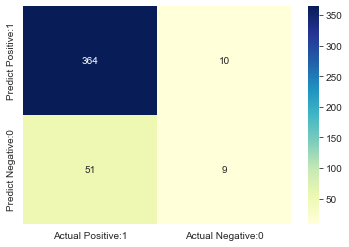

In [57]:
## plotting confusion matrix which shows true positive,true negative,false positive,false negative values .


cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')


In [58]:
model_accuracy = (TP + TN) / (TP + TN + FP + FN)
model_accuracy

0.8594470046082949

In [59]:
precision = TP / float(TP + FP)
precision

0.9732620320855615

In [60]:
recall = TP / float(TP + FN)
recall

0.8771084337349397

In [61]:
## as the data set is highly imbalanced , it may affect the accuracy so we have to consider the f1_score as well.

f1_score=(2*recall*precision)/(recall+precision)
f1_score

0.9226869455006338

## model building using ensemble (bagging)

In [62]:
## importing required libraries.

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [63]:
## building the ensemble(bagging) model by using decision_tree as base model.

cart = DecisionTreeClassifier()
num_trees =20
model_ensemble = BaggingClassifier(base_estimator=cart, n_estimators=num_trees,random_state=42)
model_ensemble.fit(x_train,y_train)

## predicting y_train values for the corresponding x_train data.
pred_y_tr = model_ensemble.predict(x_train)
pred_y_tr

array([0, 0, 0, ..., 1, 0, 1], dtype=int64)

In [64]:
## trainning accuracy.
accuracy_score(y_train,pred_y_tr)

0.9962055881338393

In [65]:
## predictibg y_test for the corresponding x_test data.

pred_y_tst = model_ensemble.predict(x_test)
pred_y_tst

array([0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,

In [66]:
## testing accuracy .

accuracy_score(y_test,pred_y_tst)

0.9400921658986175

In [67]:
## confusion matrix for the ensemble (bagging) model.

cm_ensemble= confusion_matrix(y_test,pred_y_tst)
print('Confusion matrix\n\n', cm_ensemble)

Confusion matrix

 [[368   6]
 [ 20  40]]


In [68]:
## true positive,false positive,true negative,false negative values.

TP_en = cm_ensemble[0,0]
TN_en = cm_ensemble[1,1]
FP_en = cm_ensemble[0,1]
FN_en = cm_ensemble[1,0]

print('\ntrue positive(TP)=',TP_en)

print('\ntrue negative(TN)=',TN_en)

print('\nfalse positive(FP)=',FP_en)

print('\nfalse negative(FN)=',FN_en)



true positive(TP)= 368

true negative(TN)= 40

false positive(FP)= 6

false negative(FN)= 20


<AxesSubplot:>

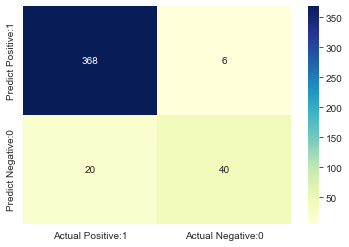

In [69]:
##visualizing confusion matrix for the model through heat map.

cm_en_matrix = pd.DataFrame(data=cm_ensemble, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_en_matrix, annot=True, fmt='d', cmap='YlGnBu')


In [70]:
## accuracy score for the ensemble(bagging)model.

ensemble_model_accuracy = (TP_en + TN_en) / (TP_en + TN_en + FP_en + FN_en)
ensemble_model_accuracy

0.9400921658986175

#### creating the ensemble model by using over sampled data .

In [99]:
#dataset has been oversampled
over_sampler = RandomOverSampler(random_state=42)
x_oversam_res, y_oversam_res = over_sampler.fit_resample(X,Y)

In [100]:
#to check number of churn and non churn values withing oversampled data
y_oversam_res.value_counts()

0    2850
1    2850
Name: churn, dtype: int64

In [101]:
#creating oversampled dataset for training and testing
x_o = x_oversam_res
y_o = y_oversam_res
x_o_train, x_o_test, y_o_train, y_o_test = train_test_split(x_o,y_o,test_size=0.25,random_state=42)
x_o_train.shape, x_o_test.shape, y_o_train.shape, y_o_test.shape

((4275, 7), (1425, 7), (4275,), (1425,))

In [108]:
## model building for oversampled data

cart2 = DecisionTreeClassifier()
num_trees2 =30
model_ensemble2 = BaggingClassifier(base_estimator=cart2,n_estimators=num_trees2,random_state=42)
model_ensemble2.fit(x_o_train,y_o_train)

## predicting y_train values for the corresponding x_train oversampled data.
pred_y_tr2 = model_ensemble2.predict(x_o_train)
pred_y_tr2

array([0, 0, 1, ..., 1, 1, 0], dtype=int64)

In [109]:
##  trainning accuracy_score 
accuracy_score(y_o_train,pred_y_tr2)

0.9997660818713451

In [110]:
## predictibg y_test for the corresponding x_test oversampled data.

pred_y_tst2 = model_ensemble2.predict(x_o_test)
pred_y_tst2

array([0, 0, 1, ..., 1, 0, 0], dtype=int64)

In [111]:
## testing accuracy score
accuracy_score(y_o_test,pred_y_tst2)

0.984561403508772

In [112]:
## confusion matrix for the ensemble (bagging) model.

cm_ensemble2= confusion_matrix(y_o_test,pred_y_tst2)
print('Confusion matrix\n\n', cm_ensemble2)

Confusion matrix

 [[716  22]
 [  0 687]]


In [113]:
## true positive,false positive,true negative,false negative values.

TP_en2 = cm_ensemble2[0,0]
TN_en2 = cm_ensemble2[1,1]
FP_en2 = cm_ensemble2[0,1]
FN_en2 = cm_ensemble2[1,0]

print('\ntrue positive(TP)=',TP_en2)

print('\ntrue negative(TN)=',TN_en2)

print('\nfalse positive(FP)=',FP_en2)

print('\nfalse negative(FN)=',FN_en2)



true positive(TP)= 716

true negative(TN)= 687

false positive(FP)= 22

false negative(FN)= 0


<AxesSubplot:>

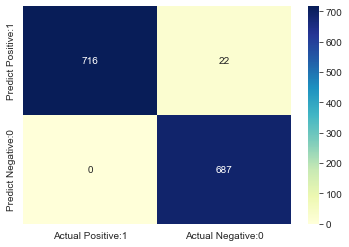

In [114]:
##visualizing confusion matrix for the model through heat map.

cm_en_matrix2 = pd.DataFrame(data=cm_ensemble2, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_en_matrix2, annot=True, fmt='d', cmap='YlGnBu')


In [115]:
## accuracy score for the ensemble(bagging)model( oversampeled data).

ensemble_model_accuracy2 = (TP_en2 + TN_en2) / (TP_en2 + TN_en2 + FP_en2 + FN_en2)
ensemble_model_accuracy2

0.984561403508772

In [116]:
from sklearn.metrics import classification_report

print(classification_report(y_o_test,pred_y_tst2))


              precision    recall  f1-score   support

           0       1.00      0.97      0.98       738
           1       0.97      1.00      0.98       687

    accuracy                           0.98      1425
   macro avg       0.98      0.99      0.98      1425
weighted avg       0.99      0.98      0.98      1425



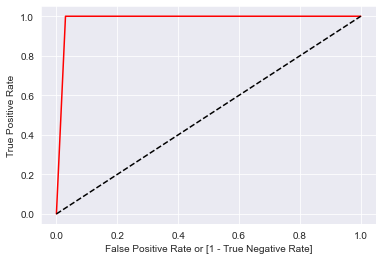

auc accuracy: 0.9850948509485095


In [117]:
## area under the receiver operating curve.

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr,tpr,thresholds=roc_curve(y_o_test,pred_y_tst2)
auc=roc_auc_score(y_o_test,pred_y_tst2)
plt.figure(figsize=(6,4))


plt.plot(fpr,tpr,color='red')
plt.plot([0,1], [0,1], 'k--' )
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.show()

print('auc accuracy:',auc)

In [37]:
# Random Forest Classification
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

X=telecom_cleaned.iloc[:,0:7]
Y=telecom_cleaned.iloc[:,7]

over_sampler = RandomOverSampler(random_state=42)
x_oversam_res, y_oversam_res = over_sampler.fit_resample(X,Y)

x_o = x_oversam_res
y_o = y_oversam_res

In [74]:
kfold = KFold(n_splits=5)

for train_index, test_index in kfold.split(x_o,y_o):
    x_o_train, x_o_test = x_o.iloc[train_index], x_o.iloc[test_index]
    y_o_train, y_o_test = y_o.iloc[train_index], y_o.iloc[test_index]
    
r_model = RandomForestClassifier(n_estimators=10, max_features=1,random_state=40,criterion='entropy')
r_model.fit(x_o_train,y_o_train)

RandomForestClassifier(criterion='entropy', max_features=1, n_estimators=10,
                       random_state=40)

In [75]:
pred_y_o_train=r_model.predict(x_o_train)
r_model.score(x_o_train,y_o_train)

0.9991228070175439

In [76]:
pred_y_o_test=r_model.predict(x_o_test)
r_model.score(x_o_test,y_o_test)

0.9956140350877193

In [77]:
from sklearn.model_selection import RandomizedSearchCV
grid_parameters = {'n_estimators': [80, 90, 100, 110, 115, 120],
                   'max_depth': [3, 4, 5, 6],
                   'max_features': [None, 'auto', 'sqrt', 'log2'], 
                   'min_samples_split': [2, 3, 4, 5]}


# define the RandomizedSearchCV class for trying different parameter combinations
random_search = RandomizedSearchCV(estimator=RandomForestClassifier(),
                                   param_distributions=grid_parameters,
                                   cv=5,
                                   n_iter=150)

# fitting the model for random search 
random_search.fit(x_o_train, y_o_train)

# print best parameter after tuning
print(random_search.best_params_)

NameError: name 'GradientBoostingClassifier' is not defined